In [1]:
import altair as alt
import pandas as pd
import os
import re

## Datos tomados de aquí: https://en.wal.unesco.org/en/discover/languages

#Endangered/unsafe (2698)
#Definitely endangered (2362)
#Not in use (1181)
#Potentially vulnerable (1163)
#Severely endangered (463)
#Critically endangered (383)
#Safe (65) 

source = pd.DataFrame({
    'Categoria': ['Estable', 'Potencialmente vulnerable', 'En peligro', 'Definitivamente en peligro', 'Severamene en peligro', 'Criticamente en peligro', 'Sin usarse'],
    'Cantidad': [65, 1163,2698, 2362, 463, 383, 1181]
})

print("Total de lenguages categorizados:",sum(source['Cantidad']))

base = alt.Chart(source)

bars = base.mark_bar().encode(
    y=alt.Y('Categoria',sort=None),
    x='Cantidad',
    color=alt.Color('Categoria', sort=None,scale=alt.Scale(range=['#077c09','#ae23d7','#fe9595','#fc5a5a','#fc4343','#ff0000','#00b2ff']), legend=None)
)

text = base.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    x='Cantidad',
    y=alt.Y('Categoria', sort=None),
    text='Cantidad'
)

bars+text

Total de lenguages categorizados: 8315


alt.LayerChart(...)

In [2]:
# Institutional 485
# Stable 3481
# Endangered 3193
# Extinct 454

## Datos tomados de aquí: https://www.ethnologue.com/
source = pd.DataFrame({
    'Categoria': ['Institucional', 'Estable', 'En peligro', 'Extintos'],
    'Cantidad': [485, 3481, 3293, 454]
})

print("Total de lenguages categorizados:",sum(source['Cantidad']))
def dms_to_decimal(dms_str):
    """
    Convert DMS string to decimal degrees
    Supports formats like: "40°26'46"N", "40d26m46sN", "40 26 46 N"
    """
    if pd.isna(dms_str):
        return None
    
    # Remove extra spaces and convert to string
    dms_str = str(dms_str).strip()
    
    # Extract numbers and direction
    numbers = re.findall(r'[\d.]+', dms_str)
    direction = re.findall(r'[NSEW]', dms_str.upper())
    
    if len(numbers) < 1:
        return None
    
    # Parse degrees, minutes, seconds
    degrees = float(numbers[0])
    minutes = float(numbers[1]) if len(numbers) > 1 else 0
    seconds = float(numbers[2]) if len(numbers) > 2 else 0
    
    # Convert to decimal
    decimal = degrees + minutes/60 + seconds/3600
    
    # Apply direction (negative for S/W)
    if direction and direction[0] in ['S', 'W']:
        decimal = -decimal
    
    return decimal

base = alt.Chart(source)

bars = base.mark_bar().encode(
    y=alt.Y('Categoria',sort=None),
    x='Cantidad',
    color=alt.Color('Categoria', sort=None,scale=alt.Scale(range=['#00ff00','#077c09','#fc4343','#ff0000']), legend=None)
)

text = base.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    x='Cantidad',
    y=alt.Y('Categoria', sort=None),
    text='Cantidad'
)

bars+text

Total de lenguages categorizados: 7713


alt.LayerChart(...)

In [3]:
#no en peligro 	2643 	34,13%
#amenazado 	1595 	20,59%
#movedizo 	1805 	23,31%
#moribundo 	422 	5,45%
#casi extinto 	299 	3,86%
#extinguido 	981 	12,67%

## Datos tomados de aquí: https://glottolog.org/langdoc/status
source = pd.DataFrame({
    'Categoria': ['No en peligro', 'Amenazado', 'En sustitucion', 'Moribundo','Casi extinto', 'Extinto'],
    'Cantidad': [2643, 1595, 1805, 442, 299, 281]
})

print("Total de lenguages categorizados:",sum(source['Cantidad']))

base = alt.Chart(source)

bars = base.mark_bar().encode(
    y=alt.Y('Categoria',sort=None),
    x='Cantidad',
    color=alt.Color('Categoria', sort=None,scale=alt.Scale(range=['#077c09','#ae23d7','#f684ee','#fe9595','#fc5a5a','#ff0000']), legend=None)
)

text = base.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    x='Cantidad',
    y=alt.Y('Categoria', sort=None),
    text='Cantidad'
)

bars+text


                     

Total de lenguages categorizados: 7065


alt.LayerChart(...)

## Glottlog

In [4]:
from pyglottolog import Glottolog, config
glottolog = Glottolog('glottolog-5.2/')
print(glottolog)

/home/ivanvladimir/projects/lom_charts/.venv/lib/python3.12/site-packages/pybtex/plugin/__init__.py:26: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


<Glottolog repos glottolog-5.2 at /home/ivanvladimir/projects/lom_charts/notebooks/glottolog-5.2>


In [5]:
languoids = {l.id: l for l in glottolog.languoids()}

In [6]:
print(config.LanguageType)

<class 'pyglottolog.config.LanguageType'>


In [7]:
from collections import Counter

languages_mx=[]
extinct=[]
for i,l in enumerate(languoids.values()):
    if l.category == "Spoken L1 Language":
        countries_=set(c.id for c in l.countries)
        if 'MX' in countries_:
            try:
                if str(l.endangerment.status.name)=='extinct':
                    extinct.append(l)
                languages_mx.append(l)

            except AttributeError:
                print("Sin status:",l.name)
           
aes_mx=Counter(l.endangerment.status.name for l in languages_mx)
egids_mx=Counter(l.endangerment.status.egids for l in languages_mx)
unesco_mx=Counter(l.endangerment.status.unesco for l in languages_mx)
elcat_mx=Counter(l.endangerment.status.elcat for l in languages_mx)

print(f"Total lenguajes en glottlog con México en countries {len(languages_mx)}")
print(aes_mx)
print(f'Lenguajes extintion en México: {",".join([l.name for l in extinct])}')

Sin status: Chichicapan Zapotec
Sin status: Amatlán Zapotec
Sin status: Zaniza Zapotec
Sin status: Texmelucan Zapotec
Sin status: Kwatl
Total lenguajes en glottlog con México en countries 303
Counter({'threatened': 127, 'shifting': 83, 'not endangered': 53, 'extinct': 25, 'moribund': 8, 'nearly extinct': 7})
Lenguajes extintion en México: Guaicurian,Coahuilteco,Comecrudan,Cuitlatec,Cotoname,Maratino,Southern Pame,Chiapanec,Teojomulco Chatino,Soltec,Chicomuceltec,Epigraphic Mayan,Robinia,Cochimi,Tequistlateco Chontal,Tubar,Teguima,Eudeve,Pochutec,Classical Nahuatl,Tepecano,Jova,Coca,Northern Tarahumara,Tapachultec


In [8]:
labels2spa={
    'extinct':'Extinto',
    'shifting':'En transición',
    'threatened':'Amenazado',
    'not endangered':'No en peligro',
    'moribund':'Moribundo',
    'nearly extinct':'Casi extinto'
}

order=['not endangered','threatened','shifting','moribund','nearly extinct','extinct']

source = pd.DataFrame({'Categoria':[labels2spa[ix] for ix in order],'Cantidad':[aes_mx[ix] for ix in order], 'Order': range(len(order))})

base=alt.Chart(source).encode(
    alt.Theta("Cantidad:Q").stack(True),
    color=alt.Color('Categoria', sort=alt.SortField('Order'),scale=alt.Scale(range=['#077c09','#ae23d7','#f684ee','#fe9595','#fc5a5a','#ff0000'])),
    order=alt.Order('Order:O')
)

pie = base.mark_arc(outerRadius=120)
text = base.mark_text(radius=140, size=12).encode(text="Cantidad")

pie + text

alt.LayerChart(...)

In [9]:
source

,Categoria,Cantidad,Order
0,No en peligro,53,0
1,Amenazado,127,1
2,En transición,83,2
3,Moribundo,8,3
4,Casi extinto,7,4
5,Extinto,25,5


In [10]:
print(egids_mx.keys())

order=['<=6a','6b','7', '8a', '8b','>=9']

source = pd.DataFrame({'Categoria':[ix for ix in order],'Cantidad':[egids_mx[ix] for ix in order], 'Order': range(len(order))})

base=alt.Chart(source).encode(
    alt.Theta("Cantidad:Q").stack(True),
    color=alt.Color('Categoria', sort=alt.SortField('Order'),scale=alt.Scale(range=['#077c09','#ae23d7','#f684ee','#fe9595','#fc5a5a','#ff0000'])),
    order=alt.Order('Order:O')
)

pie = base.mark_arc(outerRadius=120)
text = base.mark_text(radius=140, size=12).encode(text="Cantidad")

pie + text

dict_keys(['>=9', '7', '6b', '<=6a', '8a', '8b'])


alt.LayerChart(...)

In [11]:
source

,Categoria,Cantidad,Order
0,<=6a,53,0
1,6b,127,1
2,7,83,2
3,8a,8,3
4,8b,7,4
5,>=9,25,5


In [12]:
print(unesco_mx.keys())

labels2spa={
    'safe':'Estable', 'vulnerable':'Vulnerable', 'definitely endangered':'Definitivamente en peligro', 'severely endangered':'Severamene en peligro', 'critically endangered':'Criticamente en peligro','extinct':'Sin usarse'
}

order=['safe', 'vulnerable', 'definitely endangered', 'severely endangered', 'critically endangered','extinct']

source = pd.DataFrame({'Categoria':[labels2spa[ix] for ix in order],'Cantidad':[unesco_mx[ix] for ix in order], 'Order': range(len(order))})

base=alt.Chart(source).encode(
    alt.Theta("Cantidad:Q").stack(True),
    color=alt.Color('Categoria', sort=alt.SortField('Order'),scale=alt.Scale(range=['#077c09','#ae23d7','#f684ee','#fe9595','#fc5a5a','#ff0000'])),
    order=alt.Order('Order:O')
)

pie = base.mark_arc(outerRadius=120)
text = base.mark_text(radius=140, size=12).encode(text="Cantidad")

pie + text

dict_keys(['extinct', 'definitely endangered', 'vulnerable', 'safe', 'severely endangered', 'critically endangered'])


alt.LayerChart(...)

In [13]:
source

,Categoria,Cantidad,Order
0,Estable,53,0
1,Vulnerable,127,1
2,Definitivamente en peligro,83,2
3,Severamene en peligro,8,3
4,Criticamente en peligro,7,4
5,Sin usarse,25,5


In [14]:
print(elcat_mx.keys())

labels2spa={
    'safe':'Estable', 'vulnerable':'Vulnerable', 'definitely endangered':'Definitivamente en peligro', 'severely endangered':'Severamene en peligro', 'critically endangered':'Criticamente en peligro','extinct':'Sin usarse'
}

order=['at risk/safe','vulnerable','threatened/endangered','severely endangered','critically endangered','dormant/awakening']

source = pd.DataFrame({'Categoria':[ix for ix in order],'Cantidad':[elcat_mx[ix] for ix in order], 'Order': range(len(order))})

base=alt.Chart(source).encode(
    alt.Theta("Cantidad:Q").stack(True),
    color=alt.Color('Categoria', sort=alt.SortField('Order'),scale=alt.Scale(range=['#077c09','#ae23d7','#f684ee','#fe9595','#fc5a5a','#ff0000'])),
    order=alt.Order('Order:O')
)

pie = base.mark_arc(outerRadius=120)
text = base.mark_text(radius=140, size=12).encode(text="Cantidad")

pie + text

dict_keys(['dormant/awakening', 'threatened/endangered', 'vulnerable', 'at risk/safe', 'severely endangered', 'critically endangered'])


alt.LayerChart(...)

In [15]:
source

,Categoria,Cantidad,Order
0,at risk/safe,53,0
1,vulnerable,127,1
2,threatened/endangered,83,2
3,severely endangered,8,3
4,critically endangered,7,4
5,dormant/awakening,25,5


In [16]:
isos_mx=set(l.iso for l in languages_mx)
print("Different ISOs for the languages",len(isos_mx))

Different ISOs for the languages 292


In [17]:
# Fuente de datos: https://www.inegi.org.mx/temas/lengua/#informacion_general
from io import StringIO

csv_data="""Decada,Porcentaje
1930,	16
1940,	14.8
1950,	11.2
1960,	10.4
1970,	7.8
1980*,   9.0
1990,	7.5
2000,	7.1
2010,	6.7
2015,	6.6
2020,	6.2"""

csv_file = StringIO(csv_data)

df = pd.read_csv(csv_file)
df['Decada'] = df['Decada'].astype('str')
df['Porcentaje'] = pd.to_numeric(df['Porcentaje'])

base = alt.Chart(df)

bars = base.mark_bar().encode(
    y=alt.Y('Porcentaje',sort=None),
    x=alt.X('Decada:N', scale=alt.Scale(paddingInner=0.8 ))
).properties(
    width=600  # Set specific width in pixels
)

text = base.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    x='Decada:N',
    y=alt.Y('Porcentaje', sort=None),
    text='Porcentaje'
)

bars+text

alt.LayerChart(...)

In [18]:
# Fuente de datos: https://www.inegi.org.mx/temas/lengua/#informacion_general
from io import StringIO

csv_data="""Decada,Población
1930,	2.6
1940,	2.9
1950,	2.8
1960,	3.6
1970,	3.7
1980,   5.1
1990,	6.0
2000,	6.9
2010,	7.5
2020,	7.8"""

csv_file = StringIO(csv_data)

df = pd.read_csv(csv_file)
df['Decada'] = df['Decada'].astype('str')
df['Población'] = pd.to_numeric(df['Población'])

base = alt.Chart(df)

bars = base.mark_bar().encode(
    y=alt.Y('Población',sort=None, title="Población en millones"),
    x=alt.X('Decada:N', scale=alt.Scale(paddingInner=0.8 ))
).properties(
    width=600  # Set specific width in pixels
)

text = base.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    x='Decada:N',
    y=alt.Y('Población', sort=None),
    text='Población'
)

bars+text

alt.LayerChart(...)

In [19]:
csv_data="""Año,Población
1518, 25.2
1548, 16.8
1568, 2.65
1585, 1.9
1595, 1.37
1605, 1.37"""

csv_file = StringIO(csv_data)

df = pd.read_csv(csv_file)
df['Año'] = df['Año'].astype('str')
df['Población'] = pd.to_numeric(df['Población'])

base = alt.Chart(df)

bars = base.mark_bar().encode(
    y=alt.Y('Población',sort=None, title="Población en millones"),
    x=alt.X('Año:N', scale=alt.Scale(paddingInner=0.8 ))
).properties(
    width=600  # Set specific width in pixels
)

text = base.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    x='Año:N',
    y=alt.Y('Población', sort=None),
    text='Población'
)

bars+text

alt.LayerChart(...)

In [20]:
from io import StringIO
import numpy as np

csv_data="""Lengua,Mujeres,Hombres,"Total"
Náhuatl,"853625.00","798333.00","1651958.00"
Maya,"376631.00","398124.00","774755.00"
Tseltal,"298320.00","290824.00","589144.00"
Tsotsil,"282024.00","268250.00","550274.00"
Mixteco,"280869.00","245724.00","526593.00"
Zapoteco,"256681.00","234164.00","490845.00"
Otomí,"155386.00","143475.00","298861.00"
Totonaco,"132506.00","123838.00","256344.00"
Ch'ol,"128343.00","126372.00","254715.00"
Mazateco,"124598.00","112614.00","237212.00"
Huasteco,"85206.00","83523.00","168729.00"
Mazahua,"83138.00","70659.00","153797.00"
Tlapaneco,"77327.00","70105.00","147432.00"
Chinanteco,"76634.00","67760.00","144394.00"
Tarasco,"73205.00","69254.00","142459.00"
Mixe,"73896.00","65864.00","139760.00"
Tarahumara,"47070.00","44484.00","91554.00"
Zoque,"37186.00","36832.00","74018.00"
Tojolabal,"34082.00","32871.00","66953.00"
Chontal de Tabasco,"30157.00","30406.00","60563.00"
Huichol,"30891.00","29372.00","60263.00"
Amuzgo,"31488.00","28396.00","59884.00"
Chatino,"28280.00","23796.00","52076.00"
Tepehuano del sur,"22581.00","21805.00","44386.00"
Mayo,"17407.00","21100.00","38507.00"
Popoluca de la Sierra,"18747.00","17366.00","36113.00"
Cora,"16891.00","16335.00","33226.00"
Triqui,"15678.00","13867.00","29545.00"
No especificado,"10856.00","11921.00","22777.00"
Yaqui,"8952.00","10424.00","19376.00"
Huave,"9352.00","9475.00","18827.00"
Popoloca,"9337.00","7937.00","17274.00"
Cuicateco,"6788.00","6173.00","12961.00"
Pame,"6087.00","5837.00","11924.00"
Mam,"5204.00","6165.00","11369.00"
Q'anjob'al,"5604.00","5247.00","10851.00"
Tepehuano del norte,"5083.00","4772.00","9855.00"
Tepehua,"4684.00","4200.00","8884.00"
Popoluca,"4208.00","4219.00","8427.00"
Chontal de Oaxaca,"2756.00","2857.00","5613.00"
Sayulteco,"2459.00","2306.00","4765.00"
Chuj,"1778.00","1738.00","3516.00"
Akateko,"1564.00","1330.00","2894.00"
Otras lenguas,"1016.00","1437.00","2453.00"
Chichimeco Jonaz,"1162.00","1202.00","2364.00"
Tlahuica,"1146.00","1092.00","2238.00"
Guarijío,"1079.00","1060.00","2139.00"
Chontal,648.00,"1056.00","1704.00"
Q'eqchi',744.00,855.00,"1599.00"
Matlatzinca,649.00,596.00,"1245.00"
Pima,522.00,515.00,1037.00
Chocholteco,449.00,398.00,847.00
Lacandón,375.00,396.00,771.00
Seri,336.00,387.00,723.00
K'iche',275.00,314.00,589.00
Kumiai,241.00,254.00,495.00
Jakalteko,252.00,229.00,481.00
Texistepequeño,176.00,192.00,368.00
Tepehuano,130.00,187.003,17.00
Paipai,118.00,113.00,231.00
Pápago,69.00,134.00,203.00
Ixcateco,95.00,100.00,195.00
Cucapá,77.00,99.00,176.00
Kaqchikel,74.00,95.00,169.00
Qato'k,52.00,74.00,126.00
Ixil,61.00,56.00,117.00
Teko,22.00,56.00,78.00
Oluteco,29.00,48.00,77.00
Kiliwa,28.00,48.00,76.00
Ayapaneco,32.00,39.00,71.00
Kickapoo,21.00,42.00,63.00
Awakateko,10.00,10.00,20.00
"""

csv_file = StringIO(csv_data)

df = pd.read_csv(csv_file)
df['Lengua'] = df['Lengua'].astype('str')
df['Mujeres'] = pd.to_numeric(df['Mujeres'])
df['Hombres'] = pd.to_numeric(df['Hombres'])
df['Total'] = pd.to_numeric(df['Total'])
df['LogTotal'] = df['Total'].apply(np.log10)
df['LogHombres'] = df['Hombres'].apply(np.log10)
df['LogMujeres'] = df['Mujeres'].apply(np.log10)
df = df.sort_values('Total', ascending=False)

chart1 = alt.Chart(df).mark_bar(color='blue', opacity=1.0).encode(
    x=alt.X('Lengua:N',sort=None, scale=alt.Scale(paddingInner=0.2 )),
    y=alt.Y('LogTotal:Q',sort=None,axis=alt.Axis(
                labelExpr="format(pow(10,datum.value),',')",
                labels=True,
            ),title="Total hablantes (log10)")  # Log scale on y-axis
).properties(
    width=900
)

chart1

alt.Chart(...)

In [21]:
selection = alt.selection_point(fields=['Lengua'])
df = df.sort_values('Mujeres', ascending=False)

df_long = df.melt(id_vars=['Lengua'], 
                  value_vars=['LogMujeres', 'LogHombres'],
                  var_name='Sexo', 
                  value_name='Población')

chart3 = alt.Chart(df_long).mark_bar(opacity=1).encode(
    x=alt.X('Lengua:N',sort=None),
    y=alt.Y('Población:Q',sort=None,axis=alt.Axis(
                labelExpr="format(pow(10,datum.value),',')",
                labels=True,
            ),title="Total hablantes por sexo [log10]"),
    color=alt.Color('Sexo:N',
                    scale=alt.Scale(domain=['LogMujeres', 'LogHombres'],range=['orange', 'green']),
                    legend=alt.Legend(labelExpr="datum.value == 'LogMujeres' ? 'Mujeres' : 'Hombres'")),
    xOffset='Sexo:N'
).properties(
    width=900
)

chart3

alt.Chart(...)

In [22]:
csv_data="""Rango,Total,Población
De 3 a 4 años,4283311,187460
De 5 a 9 años,	10764379,	554649
De 10 a 14 años,	10943540,	618813
De 15 a 19 años,	10806690,	609072
De 20 a 24 años,	10422095,	582310
De 25 a 29 años,	9993001,	582469
De 30 a 34 años,	9420827,	565368
De 35 a 39 años,	9020276,	565693
De 40 a 44 años,	8503586,	530425
De 45 a 49 años,	7942413,	491837
De 50 a 54 años,	7037532,	444447
De 55 a 59 años,	5695958,	387478
De 60 a 64 años,	4821062,	339788
De 65 a 69 años,	3645077,	298543
De 70 a 74 años,	2647340,	218730
De 75 a 79 años,	1814582,	168287
De 80 a 84 años,	1175364,	111309
85 años y más,	1039551,	107967"""

csv_file = StringIO(csv_data)

df = pd.read_csv(csv_file)
df['Rango'] = df['Rango'].astype('str')
df['Total'] = pd.to_numeric(df['Total'])
df['Población'] = pd.to_numeric(df['Población'])
df=df.reindex(index=df.index[::-1])

base = alt.Chart(df).properties(
    width=250
)

left = base.encode(
    alt.Y('Rango:O').axis(None),
    alt.X('Población:Q', sort=None)
        .title('Población')
        .sort('descending'),
).mark_bar()

middle = base.encode(
    alt.Y('Rango:O',sort=None).axis(None),
    alt.Text('Rango:O'),
).mark_text().properties(width=100)

right = base.encode(
    alt.Y('Rango:O').axis(None),
    alt.X('Población:Q',sort=None),
 ).mark_bar()

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)

In [23]:
csv_data="""Rango,Total,Hombres,Mujeres
De 3 a 4 años, 	187460, 	92951, 	94509
De 5 a 9 años, 	554649, 	275679, 	278970
De 10 a 14 años, 	618813, 	310752, 	308061
De 15 a 19 años, 	609072, 	302616, 	306456
De 20 a 24 años, 	582310, 	282098, 	300212
De 25 a 29 años, 	582469, 	278502, 	303967
De 30 a 34 años, 	565368, 	269694, 	295674
De 35 a 39 años, 	565693, 	271228,	294465
De 40 a 44 años, 	530425, 	255842, 274583
De 45 a 49 años, 	491837, 	238114, 	253723
De 50 a 54 años, 	444447, 	213527, 	230920
De 55 a 59 años, 	387478, 	186158, 	201320
De 60 a 64 años, 	339788, 	164705, 	175083
De 65 a 69 años, 	298543, 	144933, 	153610
De 70 a 74 años, 	218730, 	108092, 	110638
De 75 a 79 años, 	168287, 	83693,	84594
De 80 a 84 años, 	111309, 	53609, 	57700
85 años y más, 	107967, 	49005, 	58962
"""

csv_file = StringIO(csv_data)

df = pd.read_csv(csv_file)
df['Rango'] = df['Rango'].astype('str')
df['Total'] = pd.to_numeric(df['Total'])
df['Mujeres'] = pd.to_numeric(df['Mujeres'])
df['Hombres'] = pd.to_numeric(df['Hombres'])

df=df.reindex(index=df.index[::-1])

base = alt.Chart(df).properties(
    width=250
)

left = base.encode(
    alt.Y('Rango:O').axis(None),
    alt.X('Mujeres:Q', sort=None)
        .title('Mujeres')
        .sort('descending')
).mark_bar(color='orange', opacity=0.8)

middle = base.encode(
    alt.Y('Rango:O',sort=None).axis(None),
    alt.Text('Rango:O'),
).mark_text().properties(width=100)

right = base.encode(
    alt.Y('Rango:O').axis(None),
    alt.X('Hombres:Q',sort=None),
 ).mark_bar(color='green', opacity=0.8)


alt.concat(left, middle, right, spacing=5)


alt.ConcatChart(...)

In [24]:


def dms_to_decimal(dms_str):
    """
    Convert DMS string to decimal degrees
    Supports formats like: "40°26'46"N", "40d26m46sN", "40 26 46 N"
    """
    if pd.isna(dms_str):
        return None
    
    # Remove extra spaces and convert to string
    dms_str = str(dms_str).strip()
    
    # Extract numbers and direction
    numbers = re.findall(r'[\d.]+', dms_str)
    direction = re.findall(r'[NSEW]', dms_str.upper())
    
    if len(numbers) < 1:
        return None
    
    # Parse degrees, minutes, seconds
    degrees = float(numbers[0])
    minutes = float(numbers[1]) if len(numbers) > 1 else 0
    seconds = float(numbers[2]) if len(numbers) > 2 else 0
    
    # Convert to decimal
    decimal = degrees + minutes/60 + seconds/3600
    
    # Apply direction (negative for S/W)
    if direction and direction[0] in ['S', 'W']:
        decimal = -decimal
    
    return decimal


dfs=[]
for dirpath, dirnames, filenames in os.walk("../data"):
    for filename in filenames:
      if filename.startswith("ITER2020"):
        print(filename)
        csv_data=open(os.path.join(dirpath,filename)).read()
        csv_file = StringIO(csv_data)
        df = pd.read_csv(csv_file)
        df = df[~df['NOM_MUN'].str.startswith(('Total'))]
        df = df[~df['NOM_LOC'].str.startswith(('Total'))]
        df = df[~df['NOM_LOC'].str.startswith(('Localidades de'))]

        df = df.replace('*', 1)
        df = df.replace('N/D', 0)
        
        df['P3YM_HLI'] = pd.to_numeric(df['P3YM_HLI'])
        df = df.drop(df[df['P3YM_HLI'] == 0].index)
        df['P3YM_HLI']=df['P3YM_HLI'].apply(np.log10)
        df['LONGITUD'] = df['LONGITUD'].apply(dms_to_decimal)
        df['LATITUD'] = df['LATITUD'].apply(dms_to_decimal)

        dfs.append(df)

df=pd.concat(dfs)
print(df['P3YM_HLI'].max())

ITER2020 - 17 Morelos.csv
ITER2020 - 14 Jalisco.csv
ITER2020 - 04 Campeche.csv
ITER2020 - 01 Aguascalientes.csv
ITER2020 - 32 Zacatecas.csv
ITER2020 - 02 Baja California.csv
ITER2020 - 13 Hidalgo.csv
ITER2020 - 09 Ciudad de México.csv
ITER2020 - 06 Colima.csv
ITER2020 - 24 San Luis Potosí.csv
ITER2020 - 31 Yucatán.csv
ITER2020 - 12 Guerrero.csv
ITER2020 - 22 Querétaro.csv
ITER2020 - 11 Guanajuato.csv
ITER2020 - 19 Nuevo León.csv
ITER2020 - 21 Puebla.csv
ITER2020 - 26 Sonora.csv
ITER2020 - 03 Baja California Sur.csv
ITER2020 - 30 Veracruz de Ignacio de la Llave.csv
ITER2020 - 23 Quintana Roo.csv
ITER2020 - 10 Durango.csv
ITER2020 - 28 Tamaulipas.csv
ITER2020 - 27 Tabasco.csv
ITER2020 - 18 Nayarit.csv
ITER2020 - 08 Chihuahua.csv
ITER2020 - 15 México.csv
ITER2020 - 16 Michoacán de Ocampo.csv
ITER2020 - 29 Tlaxcala.csv
ITER2020 - 20 Oaxaca.csv
ITER2020 - 07 Chiapas.csv
ITER2020 - 25 Sinaloa.csv
ITER2020 - 05 Coahuila de Zaragoza.csv
4.771197837317138


In [37]:
!git clone https://github.com/jschleuss/mexican-states.git

Cloning into 'mexican-states'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (4/4), done.
remote: Total 25 (delta 3), reused 3 (delta 3), pack-reused 21 (from 1)
Receiving objects: 100% (25/25), 7.02 MiB | 10.57 MiB/s, done.
Resolving deltas: 100% (5/5), done.


/home/ivanvladimir/projects/lom_charts/.venv/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: mexican-states/mexican-states.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


ITER2020 - 17 Morelos.csv
ITER2020 - 14 Jalisco.csv
ITER2020 - 04 Campeche.csv
ITER2020 - 01 Aguascalientes.csv
ITER2020 - 32 Zacatecas.csv
ITER2020 - 02 Baja California.csv
ITER2020 - 13 Hidalgo.csv
ITER2020 - 09 Ciudad de México.csv
ITER2020 - 06 Colima.csv
ITER2020 - 24 San Luis Potosí.csv
ITER2020 - 31 Yucatán.csv
ITER2020 - 12 Guerrero.csv
ITER2020 - 22 Querétaro.csv
ITER2020 - 11 Guanajuato.csv
ITER2020 - 19 Nuevo León.csv
ITER2020 - 21 Puebla.csv
ITER2020 - 26 Sonora.csv
ITER2020 - 03 Baja California Sur.csv
ITER2020 - 30 Veracruz de Ignacio de la Llave.csv
ITER2020 - 23 Quintana Roo.csv
ITER2020 - 10 Durango.csv
ITER2020 - 28 Tamaulipas.csv
ITER2020 - 27 Tabasco.csv
ITER2020 - 18 Nayarit.csv
ITER2020 - 08 Chihuahua.csv
ITER2020 - 15 México.csv
ITER2020 - 16 Michoacán de Ocampo.csv
ITER2020 - 29 Tlaxcala.csv
ITER2020 - 20 Oaxaca.csv
ITER2020 - 07 Chiapas.csv
ITER2020 - 25 Sinaloa.csv
ITER2020 - 05 Coahuila de Zaragoza.csv


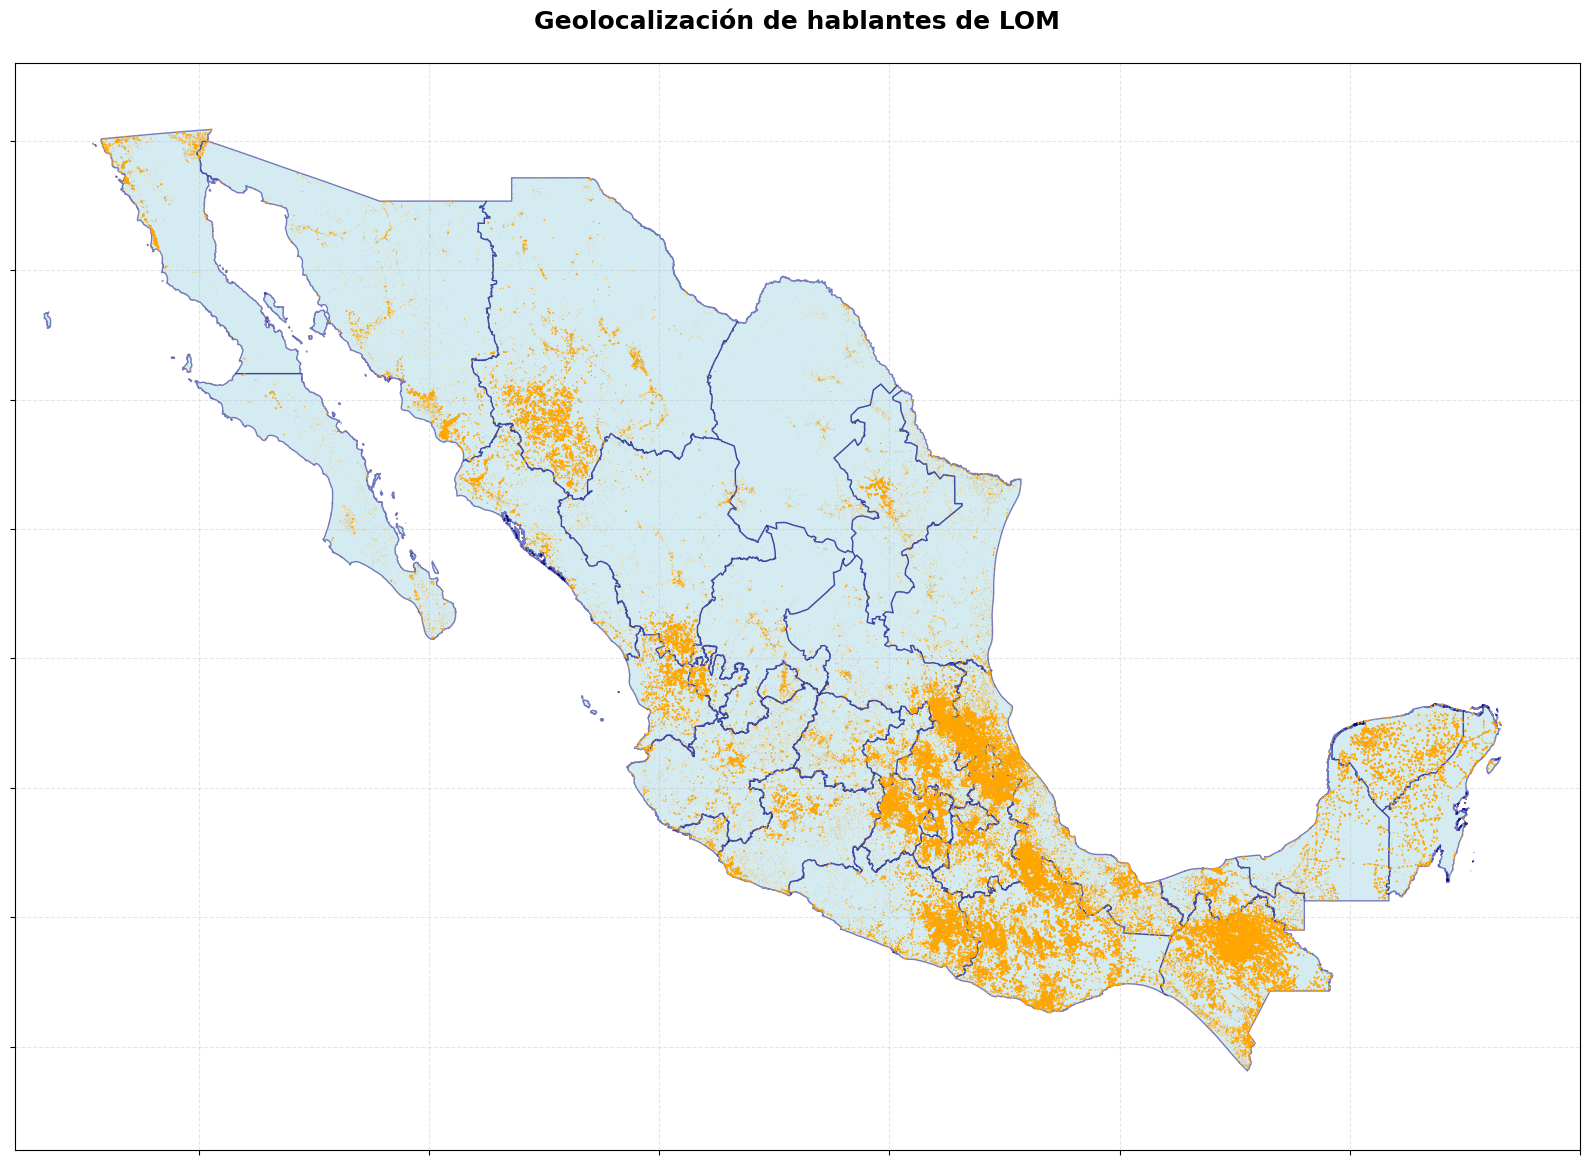

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import contextily as ctx
import numpy as np
import requests
import zipfile

mexico=gpd.read_file("mexican-states/mexican-states.shp")

fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Plot Mexico with modern styling
mexico.plot(ax=ax, 
           color='lightblue', 
           edgecolor='navy', 
           linewidth=1, 
           alpha=0.5)

for dirpath, dirnames, filenames in os.walk("../data"):
    for filename in filenames:
      if filename.startswith("ITER2020"):
        print(filename)
        csv_data=open(os.path.join(dirpath,filename)).read()
        csv_file = StringIO(csv_data)
        df = pd.read_csv(csv_file)
        df = df[~df['NOM_MUN'].str.startswith(('Total'))]
        df = df[~df['NOM_LOC'].str.startswith(('Total'))]
        df = df[~df['NOM_LOC'].str.startswith(('Localidades de'))]

        df = df.replace('*', 1)
        df = df.replace('N/D', 0)
        
        df['P3YM_HLI'] = pd.to_numeric(df['P3YM_HLI'])
        df = df.drop(df[df['P3YM_HLI'] == 0].index)
        df['P3YM_HLI']=df['P3YM_HLI'].apply(np.log10)
        df['LONGITUD'] = df['LONGITUD'].apply(dms_to_decimal)
        df['LATITUD'] = df['LATITUD'].apply(dms_to_decimal)
        df['MS'] = np.round(df['P3YM_HLI']+0.1,1)

        # Create GeoDataFrame with explicit CRS
        geometry = [Point(xy) for xy in zip(df.LONGITUD, df.LATITUD)]
        gdf_points = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
           
        data = gdf_points
        data.plot(ax=ax, 
                     color="orange",
                     markersize=df['MS'],
                     alpha=1.0,
                     edgecolor=None,
                     linewidth=0)    
    
# Modern map styling
ax.set_xlim(-119, -85)
ax.set_ylim(13, 34)
ax.set_title('Geolocalización de hablantes de LOM', 
        fontsize=18, fontweight='bold', pad=25)

# Add grid with modern styling
ax.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])


# Tight layout to prevent legend cutoff
plt.tight_layout()
plt.savefig('mapa.png')

In [30]:
!wget "https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/Censo2020_CA_eum_csv.zip"
!unzip Censo2020_CA_eum_csv.zip Personas00.CSV

--2025-06-18 02:09:31--  https://www.inegi.org.mx/contenidos/programas/ccpv/2020/microdatos/Censo2020_CA_eum_csv.zip
Resolving www.inegi.org.mx (www.inegi.org.mx)... 200.23.8.5
Connecting to www.inegi.org.mx (www.inegi.org.mx)|200.23.8.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 486238463 (464M) [application/x-zip-compressed]
Saving to: ‘Censo2020_CA_eum_csv.zip’

Censo2020_CA_eum_cs 100%[===================>] 463.71M  2.83MB/s    in 3m 45s  

2025-06-18 02:13:16 (2.06 MB/s) - ‘Censo2020_CA_eum_csv.zip’ saved [486238463/486238463]

Archive:  Censo2020_CA_eum_csv.zip
caution: filename not matched:  Personas01.CSV


In [1]:
df = pd.read_csv('Personas00.CSV')
df.head()

NameError: name 'pd' is not defined